# **Chapter 6 - Decision Trees**
Same as **SVMs** **Decision Trees** can also perform both classification and Regression Tasks here are some of the capabilities of `Decision Trees` :-
- Calssification Tasks
- Regression Tasks
- Mutioutput Tasks
- can Fit Complex Datasets

`Decision Trees` are also fundamental Components of `Random Forest`

In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "5.Support_Vector_Machines"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Training and Visualizing a Decision Tree
with the Purpose of understanding Decision Trees Let's Train it on `iris` dataset.

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # Petal Length and Width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

Now we can Visualize the trained Decision Tree by first using `export_graphviz()` method to output a graph definition file called `iris_tree.dot`

In [3]:
from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf,
    out_file="iris_tree.dot",
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

After this we can use command line tool `dot` to convert this file into `png` or other formats by the command given below:-
```bash
$ dot -Tpng iris_tree.dot -o iris_tree.png
``` 

<div align="center">

![iris_tree.png](iris_tree.png)
<p>iris_tree.png</p>

</div>

- As You can See in the given Figure `Decision Trees` Follow a very **Straightforward and Systematic Path** to make Predictions which even we humans can also Replicate Manually.

# Some Basic Nodes of Decision Tree
1. **Root Nodes**
   - The Main Node which is Directly or Indirectly Connected to all of the Node of a `Decision Tree`.
   - It Contains all of the Dataset inside it.
   - In the Tree of `Iris Dataset` that We Trained it is the Node from which the Model is starting Predictions.
2. **Branch Nodes**
   - The Nodes Coming after the `Root Nodes` are known as Branch Nodes except `Leaf Nodes`.
   - These Nodes are also Birth Points of other Nodes.
   - In the Tree of `Iris Dataset` that We Trained these are the orange and white Nodes which come after the `Root Node`.
3. **Leaf Nodes**
   - The Nodes at the end of the `Decision Tree` are known as `Leaf Nodes`.
   - These Nodes are not Birth Point of any other Node.
   - In the Tree of `Iris Dataset` that We Trained these are the green and purple Nodes at the end.

# Making Predictions
1. A `node's sample attribute` counts how many training instances it applies to.
  - **e.g** - 100 training instances have a petal length greater thatn 2.45cm(depth 1 right), and of those 54 have a petal width smaller than 1.75cm(depth 2 left).
2. A `node's Value attribute` tells hwo many training instances of each class this node applies to.
  - **e.g** - the bottom-right node applies to -
    - 0 Iris Setosa
    - 1 Iris Versicolor
    - 45 Iris Virginica
3. Finally a node's gini attribute measures its impurity.
   - **e.g** - For Example
     - `gini=0` - Completely Pure
     - with Increasing Value of `gini` impurity increases.

## Gini Impurity
$$
G_i = 1 - \sum^n_{k = 1} P_{i, k^2}
$$
<p align="center"><b>Equation 6-1: Gini Impurity</b></p>


In this equation:
- $P_{i,k}$ is the ration of class *k* instances among the training instances in teh $i^{th}$ node.

**This Code is only for Plotting Graph.**

Saving figure decision_tree_decision_boundaries_plot


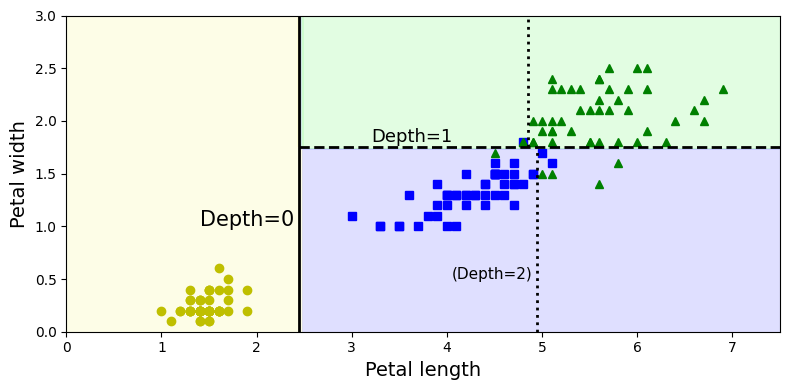

In [4]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

save_fig("decision_tree_decision_boundaries_plot")
plt.show()

These are the **Decision Boundaries** of the Model on `iris` dataset that we have Trained above.

## Model Interpretation: White Box Versus Black Box

| White Box | Black Box |
| :--: | :--: |
| Everything about the Model is Compleately Open and most of the Times we can even Replicate those steps in Real Life. | Predictions of these Models are very Good but we don't know on the basis of What they are Making these Predictions. |
| **e.g** - `Decision Trees` | **e.g** - `SVMs`, `Random Forest` , `Linear Models` *etc.* |

# Estimating Class Probabilities
A Decision Tree can also estimate Probabilites of a Class with `predict_proba(X)` method

In [5]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [6]:
tree_clf.predict([[5, 1.5]])

array([1])

As you can see that the Prediction is `1` which has the highest probability according to the `predict_proba(X)` function.

# The `CART` Training Algorithm
- `CART` - **Classfication and Regression Tree**
- This algorithm works by first **splitting the training set** into two subsets using a single feature $k$ and a threshhold $t_k$ After that it keeps splitting the subsets into two subsets until it reaches the threshold(`max_depth`).
- It finds the pair of $k$ and $t_k$ with the equation given below :-

$$
J(k, t_k) = \frac{m_{left}}{m} G_{left} + \frac{m_{right}}{m} G_{right} \\
\text{where}
\begin{cases}
G_{left/right} \text{ measures the impurity of the $left/right$ subset} \\
m_{left/right} \text{ is the number of instances in the $left/right$ subset.}
\end{cases}
$$
<p align="center"><b>Equation 6-2: CART cost function for classification</b></p>

# Computational Complexity
- Make Predictions in `Decision Trees` requires trasversing the **Decision Tree** from `Leaf` to `Node` and it Requires rounghly going through $O(log_2(m))$ Nodes.
- Since each node only requires checking the value of one feature the overall prediction complexity is $O(log_2(m))$ independant of the number of features.

# Gini Impurity or Entropy?
- By Default `Gini Impurity` is used but you can set it to `entropy` whenever you want.
- `entropy` is `0` when it contains instances of only one class **Equation 6-3** shows value of *entropy* for the $i^{th}$ node.

$$
H_i = - \sum_{\substack{{k=1} \\ {P_{i, k} \neq 0}}}^n \cdot P_{i, k} \cdot log_2(P_{i, k})
$$
<center><b>Equation 6-3: Entropy</b></center>

Which one should we use :-
| Gini Impurity | Entropy |
| :--: | :--: |
| Faster than `entropy` to compute | Slower than `gini_impurity` to compute |
| Isolates the most frequent class in its own branch of the Tree | Produces slightly more balanced Trees|
| Good Default | Better for specific Purpose |

# Regularization Hyperparameters
Regularizing hyperparameters of decision trees are used to control the complexity of the tree and prevent it from overfitting the training data. Some of the most common regularizing hyperparameters of decision trees are:

* **`max_depth:`** This hyperparameter specifies the maximum depth of the tree. A deeper tree can learn more complex relationships between the features and the target variable, but it is also more likely to overfit. By reducing the max_depth, we can force the tree to be simpler and less likely to overfit.
* **`min_samples_split:`** This hyperparameter specifies the minimum number of samples required to split a node. A lower value will allow the tree to split on smaller groups of data, which can lead to overfitting. By increasing the min_samples_split, we can force the tree to split on larger groups of data, which will make it less likely to overfit.
* **`min_samples_leaf:`** This hyperparameter specifies the minimum number of samples required at a leaf node. A lower value will allow the tree to have leaf nodes with very few samples, which can lead to overfitting. By increasing the min_samples_leaf, we can force the tree to have leaf nodes with more samples, which will make it less likely to overfit.
* **`min_weight_fraction_leaf:`** This hyperparameter specifies the minimum fraction of the total weight of the samples required at a leaf node. This hyperparameter is similar to min_samples_leaf, but it takes into account the weight of each sample. A lower value will allow the tree to have leaf nodes with a very small fraction of the total weight, which can lead to overfitting. By increasing the min_weight_fraction_leaf, we can force the tree to have leaf nodes with a larger fraction of the total weight, which will make it less likely to overfit.

Other regularizing hyperparameters of decision trees include:

* **`max_leaf_nodes`:** This hyperparameter specifies the maximum number of leaf nodes in the tree.
* **`max_features:`** This hyperparameter specifies the maximum number of features to consider at each split.
* **`presort:`** This hyperparameter specifies whether or not to pre-sort the data before splitting the nodes. Pre-sorting can improve the performance of the algorithm, but it can also lead to overfitting.

To regularize a decision tree, we can tune the hyperparameters to find the values that produce the best performance on a held-out validation set. It is important to note that there is no one-size-fits-all approach to regularizing decision trees. The best hyperparameters will vary depending on the specific dataset and problem.

Here are some tips for regularizing decision trees:

* Start with the default hyperparameters and then tune them one at a time.
* Use a held-out validation set to evaluate the performance of different hyperparameter settings.
* Avoid using too many hyperparameters, as this can make it difficult to find the optimal settings.
* Use a regularization technique, such as cross-validation, to prevent overfitting.

Once you have found a set of hyperparameters that produce good performance on the validation set, you can train the decision tree on the entire training set and use it to make predictions on new data.

**This Code is only for Plotting the Graph.**

Saving figure min_samples_leaf_plot


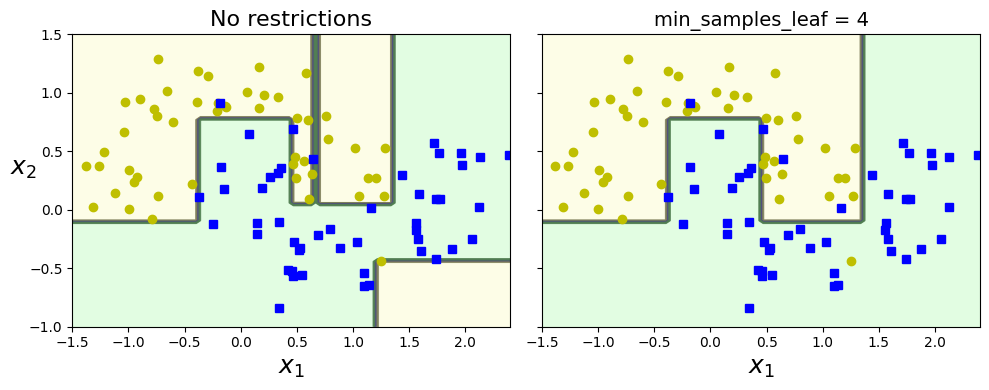

In [7]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.sca(axes[1])
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)
plt.ylabel("")

save_fig("min_samples_leaf_plot")
plt.show()

You can see that even by adding just one **Hyperparameter** outcome changes **Drastically**(In a Positive Manner with).

# Regression
As we know Decision Trees are also capable of **Regression** Tasks and for a Demo we are Going to train it on a noisy `quadratic` dataset with `max_depth=2`.

In [8]:
# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [9]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2)

In [10]:
tree_reg.predict([[0.6]])

array([0.11063973])

In [11]:
export_graphviz(
    tree_reg,
    out_file="tree_reg.dot",
    feature_names=["X"],
    class_names=["y"],
    rounded=True,
    filled=True
)

```bash
dot -Tpng tree_reg.dot -o tree_reg.png
```

![tree_reg.png](tree_reg.png)
<center><b>Figure 6-4: Tree for Regression</b></center>

This tree is very **similar** to the `Classification Tree` we saw earlier the Main Difference Between these two trees is that it Predicts an Average Value for each of leaves when we `predict()` values it performs some calculations around the Average Value and then we get our final Result.

$$
J(k, t_k) = \frac{m_{left}}{m} G_{left} + \frac{m_{right}}{m} G_{right} \enspace \enspace
\text{where}
\begin{cases}
MSE_{node} = \sum\limits_{i \enspace \in \enspace node} \cdot (\hat{y}_{node} - y^{(i)})^2 \\
\hat{y}_{node} = \frac{1}{m_{node}} \cdot \sum\limits_{i \enspace \in \enspace node} \cdot \enspace y^{(i)}
\end{cases}
$$
<center><b>Equation 6-4: CART cost function for Regression</b></center>


- Just Like for Classification Tasks Decision Trees are Prone to Overfitting also in Regression Tasks and we can Limit it by using some parameters like `min_sample_leaf()` and `max_depth()` is always there.
- BTW I will Recommend You to Just Leave `max_depth()` to none for every Piece of Code written in this Notebook and see what Happens.